# Использование метода главных компонент

### Рассмотрим переход к новым координатам, а также восстановление изображения с помощью метода главных компонент

In [1]:
# выгрузим необходимые библиотеки
import numpy as np
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

У нас есть файл с 60 объектами, имеющими 10 признаков.

In [2]:
X = pd.read_csv("pca_test_data.csv", header = None)
X.head()

,0,1,2,3,4,5,6,7,8,9
0,-21.758750,-11.043222,-21.322624,19.233025,-7.624013,8.217733,-15.496303,-8.225633,-23.459373,-8.503266
1,-11.954435,5.731338,21.649597,-12.314079,-2.302002,-15.050914,-6.663314,5.184141,13.271218,-21.778988
2,-25.993705,-9.174623,-23.294676,16.449114,-4.912752,6.100581,-12.318147,-8.163711,-22.736823,-9.275570
3,9.447535,2.893105,-17.693701,-16.145291,-10.196801,-18.332392,20.865531,10.760516,-12.218150,4.898756
4,-10.090899,9.779838,19.617699,-11.942188,-1.694636,-13.898268,-6.987190,5.526610,13.324163,-22.001462


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       60 non-null     float64
 1   1       60 non-null     float64
 2   2       60 non-null     float64
 3   3       60 non-null     float64
 4   4       60 non-null     float64
 5   5       60 non-null     float64
 6   6       60 non-null     float64
 7   7       60 non-null     float64
 8   8       60 non-null     float64
 9   9       60 non-null     float64
dtypes: float64(10)
memory usage: 4.8 KB


Перейдем к новым координатам и найдем следующие признаки:

- координаты первого объекта относительно первой и второй главной компонент

In [4]:
 # так как матрица небольшая, используем метод 'full' для вычисления разложения матрицы
pca = PCA(n_components=2, svd_solver='full')
X_transformed = pca.fit(X).transform(X)
X_transformed[0]

array([ -2.49279543, -34.21521225])

- долю объясненной дисперсии (при использовании первых двух главных компонент)

In [5]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance[1]

0.607

- какое минимальное количество главных компонент необходимо использовать, чтобы доля объясненной дисперсии превышала 0.85 (выбираем номер компоненты, после которого доля становится > 0.85, в данном случае это 4 компонента - 0.942)

In [6]:
pca = PCA(n_components=10, svd_solver='auto')
X_full = pca.fit(X).transform(X)
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance

array([0.363, 0.607, 0.84 , 0.942, 0.996, 0.997, 0.998, 0.999, 0.999,
       1.   ])

In [7]:
print('4 компонента:', explained_variance[3])

4 компонента: 0.942


- используя только две главные компоненты, найдем, на сколько групп можно поделить объекты

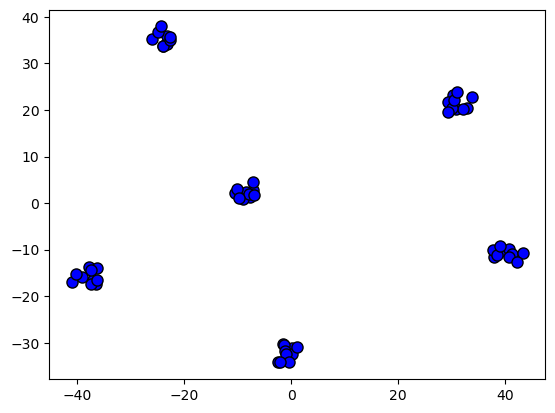

In [8]:
plt.plot(X_transformed[:60, 0], X_transformed[:60, 1], 'o', markerfacecolor='blue', markeredgecolor='k', markersize=8)
# получается 6 групп

### Теперь попробуем восстановить изображение по 10 главным компонентам

В двух файлах хранятся матрица счетов и матрица весов этих компонент.

Чтобы мы могли использовать математические операции, выгрузим файлы сразу в массив

In [9]:
scores = np.genfromtxt('X_reduced.csv', delimiter=';')
loadings = np.genfromtxt('X_loadings.csv', delimiter=';')

Вычислим матричное произведение, а затем выведем его с помощью цветовой сетки

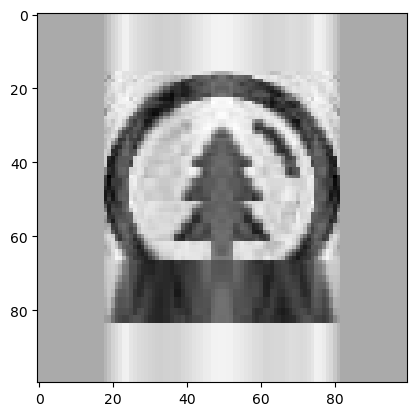

In [10]:
values = np.dot(scores,loadings.T)
plt.imshow(values, cmap='Greys_r')

Так мы увидели различные способы использования метода главных компонент